In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])


y_pred

C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\2546728067.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


array([1])

Saving figure perceptron_iris_plot


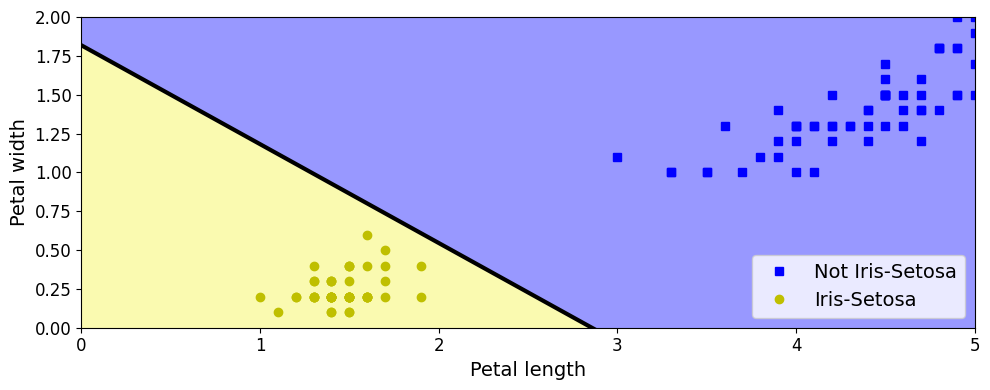

In [3]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


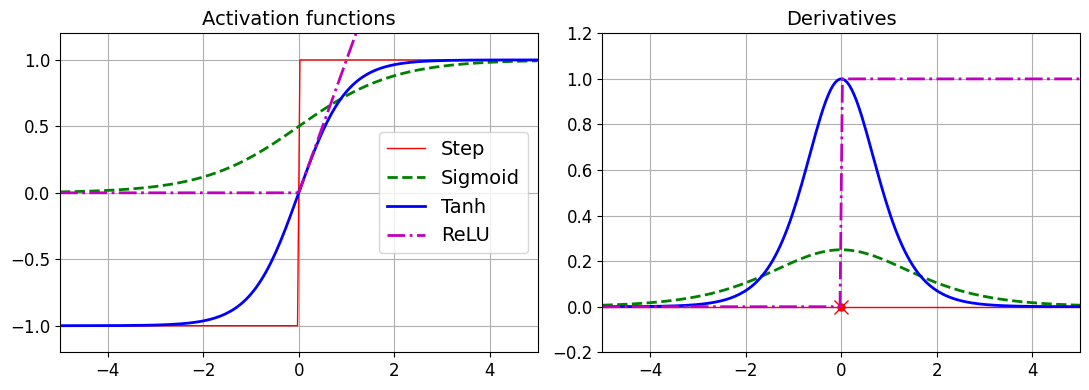

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

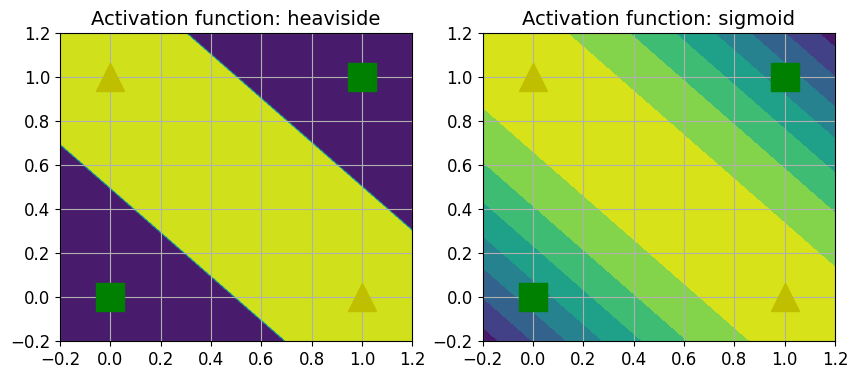

In [6]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)



x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [11]:
import tensorflow as tf
from tensorflow import keras

In [7]:
print(tf.config.list_physical_devices('GPU'))

[]


In [8]:
tf.__version__

'2.10.1'

In [12]:
keras.__version__

'2.10.0'

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
X_train_full.shape


(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

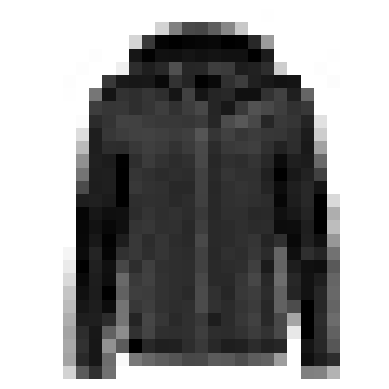

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
y_train.shape

(55000,)

In [23]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


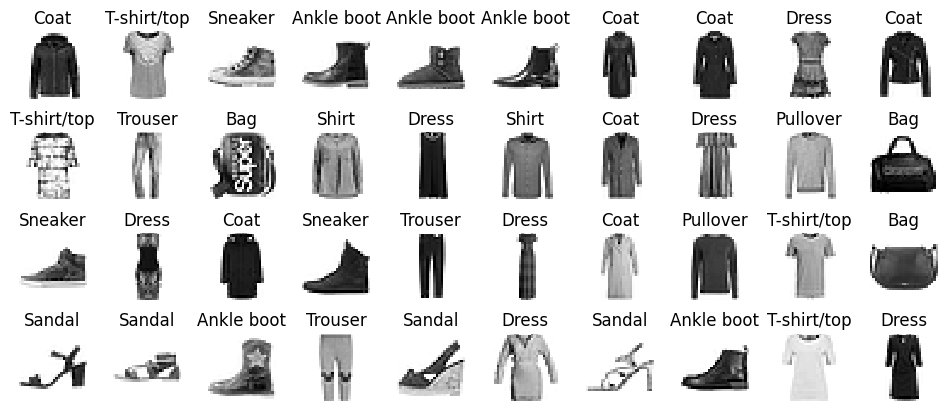

In [70]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [24]:
#Now let’s build the neural network! Here is a classification MLP with two hidden lay‐
#ers:
model = keras.models.Sequential() #preparing a model MLP this is the simplest form 
model.add(keras.layers.Flatten(input_shape=[28, 28]))  #input neurons It is a Flatten layer whose role is simply to 
                                                        #convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu"))  #first hidden layers with 300 neurones
model.add(keras.layers.Dense(100, activation="relu"))   #second hidden layers with 100 neurones
model.add(keras.layers.Dense(10, activation="softmax"))  #output neurons with 10 neurones

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
#Instead of adding the layers one by one as we just did, you can pass a list of layers
#when creating the Sequential model:

model1 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[64, 18]), #28, 28
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(17, activation="softmax") #10
])


In [62]:
model.layers

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               345900    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 17)                1717      
                                                                 
Total params: 377,717
Trainable params: 377,717
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.layers[2].name

'dense_1'

In [77]:
import pydot as py
import graphviz as gr

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [78]:
hidden1 = model.layers[2]
hidden1.name

'dense_1'

In [79]:
model.get_layer(hidden1.name) is hidden1

True

In [80]:
#All the parameters of a layer can be accessed using its get_weights() and
#set_weights() method

#For a Dense layer, this includes both the connection weights
#and the bias terms:

weights, biases = hidden1.get_weights()

In [81]:
weights

array([[-0.02757415, -0.10732099,  0.09081765, ...,  0.0429131 ,
         0.0592924 , -0.02741566],
       [ 0.03499731,  0.07715576, -0.02646106, ..., -0.04538796,
         0.10938328, -0.04848108],
       [ 0.10813267,  0.11665783, -0.12129877, ...,  0.02764993,
        -0.05307281,  0.09604954],
       ...,
       [-0.10580494,  0.00354882, -0.07882939, ..., -0.02783263,
        -0.1086705 ,  0.05011413],
       [-0.04994497,  0.03020442,  0.10604342, ...,  0.11403946,
        -0.04605457,  0.07239329],
       [-0.03718913, -0.02741238,  0.0406495 , ...,  0.09128071,
         0.08586986,  0.08778398]], dtype=float32)

In [82]:
weights.shape

(300, 100)

In [83]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [84]:
biases.shape


(100,)

In [89]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005), #"sgd",
              metrics=["accuracy"])

#"sparse_categorical_crossen
#tropy" loss because we have sparse labels (i.e., for each instance there is just a target
#class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
#ne target probability per class for each instance (such as one-hot vectors, e.g. [0.,
#0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
#to use the "categorical_crossentropy" loss instead


#"sgd" simply means that we will train the model
#using simple Stochastic Gradient Descent. In other words, Keras will perform the
#backpropagation algorithm described earlier (i.e., reverse-mode autodiff + Gradient
#Descent). 

In [49]:
import pandas as pd
df14 = pd.read_csv(r"D:\Download\Downloads\EURCHF_Candlestick_1_Hour_BID_03.08.2003-08.07.2023.csv")
df14 = df14[104000:]
df_list = [df14]
for pandas in df_list:
    if 'Gmt time' in pandas.columns:
        pandas.drop(columns=['Gmt time','Volume'], inplace=True)
    else: 
        pandas.drop(columns=['Local time','Volume'], inplace=True)
    
df14.tail()

,Open,High,Low,Close
174715,0.97438,0.97438,0.97438,0.97438
174716,0.97438,0.97438,0.97438,0.97438
174717,0.97438,0.97438,0.97438,0.97438
174718,0.97438,0.97438,0.97438,0.97438
174719,0.97438,0.97438,0.97438,0.97438


In [53]:
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
def features(data, currency_pairs):
    data['RSI']=ta.rsi(data.Close, length=50)
    data['EMAF']=ta.ema(data.Close, length=10) 
    data['EMAM']=ta.ema(data.Close, length=50)
    #data['trima']=ta.trima(data.Close, length=20)
    #data['SMA']=ta.sma(data.Close, length=10)
    data['EMA_12'] = ta.ema(data['Close'], length=12)  
    data['EMA_26'] = ta.ema(data['Close'], length=26) 
    data['MACD'] = data['EMA_12'] - data['EMA_26']      
    data['MACD_Signal'] = ta.ema(data['MACD'], length=9)   
    data.drop(columns=['EMA_12','EMA_26'], inplace=True)
    bbands = ta.bbands(data['Close'], length=20)
    data['Bollinger_Upper'], data['Bollinger_Middle'], data['Bollinger_Lower'] = bbands['BBL_20_2.0'], bbands['BBM_20_2.0'], bbands['BBU_20_2.0']
    
    data['rvi'] = ta.rvi(data.Close, length = 20)
    #data['variance'] = ta.variance(data.Close, length = 15)
    data.dropna(inplace=True)
    #data.dropna(how='any', axis=0, inplace=True)
    #data['CCI']=ta.cci(data.High, data.Low, data.Close, length=16)
    data['ATR']=ta.atr(data.High, data.Low, data.Close, length=16)
    backrollingN = 10
    from scipy.stats import linregress
    def get_slope(array):
        y = np.array(array)
        x = np.arange(len(y))
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        return slope

    data['slopeEMAF'] = data['EMAF'].rolling(window=backrollingN).apply(get_slope, raw=True)
    data['slopeEMAM'] = data['EMAM'].rolling(window=backrollingN).apply(get_slope, raw=True)
    data['slope_MACD_Signal'] = data['MACD_Signal'].rolling(window=backrollingN).apply(get_slope, raw=True)
    #data['slopeATR'] = data['ATR'].rolling(window=backrollingN).apply(get_slope, raw=True)
    #data['slopeBollinger_Middle'] = data['Bollinger_Middle'].rolling(window=backrollingN).apply(get_slope, raw=True)
    #data['RSISlope'] = data['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)
    data.dropna(inplace=True)
    #data.dropna(how='any', axis=0, inplace=True)
    # Drop all rows with NaN values
    data=data[401:]

    actions = []
  
    prices = data.loc[:, 'Close'].to_numpy()
    volatilities = data.loc[:, 'ATR'].to_numpy()
    for i in range(len(prices)-21): 
        last_trade_price = prices[i]
        current_price = prices[i+1]
        volatility = volatilities[i+1]
        risky_reward = prices[i+2]
        risky_rewardx2 = prices[i+4]
        risky_rewardx3 = prices[i+6]
        risky_rewardx4 = prices[i+8]
        risky_rewardx5 = prices[i+10]
        risky_rewardx6 = prices[i+12]
        risky_rewardx7 = prices[i+14]
        price_diff = current_price - last_trade_price
        action = 100

        if price_diff > 0:   
            action = 9    
            if risky_reward >= current_price + volatility:
                action = 10                      
            if risky_rewardx2 >= current_price + 2 * volatility:
                action = 11
            if risky_rewardx3 >= current_price + 3 * volatility:  
                action = 12
            if risky_rewardx4 >= current_price + 4 * volatility: 
                action = 13
            if risky_rewardx5 >= current_price + 5 * volatility: 
                action = 14
            if risky_rewardx6 >= current_price + 6 * volatility: 
                action = 15
            if risky_rewardx7 >= current_price + 7 * volatility: 
                action = 16
        elif price_diff == 0:
            action = 8
        if price_diff < 0:
            action = 7
            if risky_reward <= current_price - volatility:
                action = 6                     
            if risky_rewardx2 <= current_price - 2 * volatility:
                action = 5
            if risky_rewardx3 <= current_price - 3 * volatility:  
                action = 4
            if risky_rewardx4 <= current_price - 4 * volatility: 
                action = 3
            if risky_rewardx5 <= current_price - 5 * volatility: 
                action = 2
            if risky_rewardx6 <= current_price - 6 * volatility: 
                action = 1
            if risky_rewardx7 <= current_price - 7 * volatility: 
                action = 0       
        actions.append(action)
        
    data = data[:len(data)-21]
    times = sorted(data.index.values)
    last_10pct = sorted(data.index.values)[-int(0.1*len(times))] # Last 10% of series
    last_20pct = sorted(data.index.values)[-int(0.2*len(times))] # Last 20% of series
    
    data['action'] = actions

    df_train = data[(data.index < last_20pct)]  # Training data are 80% of total data 
    df_val = data[(data.index >= last_20pct) & (data.index < last_10pct)]
    df_test = data[(data.index >= last_10pct)]
    #scaler = StandardScaler() 
    action_train, action_val, action_test = list(df_train['action']), list(df_val['action']), list(df_test['action'])

    df_train.drop(columns=['action'], inplace=True)
    df_val.drop(columns=['action'], inplace=True) 
    df_test.drop(columns=['action'], inplace=True) 
    
    scaler = MinMaxScaler(feature_range=(0,1))
    
    train_data = df_train.values
    val_data = df_val.values
    test_data = df_test.values 
    train_data, val_data, test_data= scaler.fit_transform(train_data), scaler.fit_transform(val_data), scaler.fit_transform(test_data)
    
    train_data, val_data, test_data = pd.DataFrame(train_data), pd.DataFrame(val_data), pd.DataFrame(test_data)
    train_data['action'], val_data['action'], test_data['action'] = action_train, action_val, action_test
    train_data['token'], val_data['token'], test_data['token'] = currency_pairs, currency_pairs, currency_pairs
    
    return train_data, val_data, test_data
    
feature_train = []
feature_val = []
feature_test = []
currency_pairs = ["USDCHF_1H","EURUSD_1H","GBPUSD_1H","USDJPY_1H","USDCAD_1H","AUDUSD_1H","NZDUSD_1H","EURJPY_1H","EURGBP_1H","EURCAD_1H","EURCHF_1H"] 
currency_token_ids = { 
    "USDCHF_1H": 0, 
    "EURUSD_1H": 1,
    "GBPUSD_1H": 2,
    "USDJPY_1H": 3,
    "USDCAD_1H": 4,
    "AUDUSD_1H": 5,
    "NZDUSD_1H": 6,
    "EURJPY_1H": 7,
    "EURGBP_1H": 8,
    "EURCAD_1H": 9,
    "EURCHF_1H": 10
}
k = 0
for i, data in enumerate(df_list):
    if k == 1:
        break
    currency_pair = currency_token_ids[currency_pairs[i]]
    feat = features(data, currency_pair)
    feature_train.append(feat[0]) #features(data, currency_pair)[0]
    feature_val.append(feat[1]) 
    feature_test.append(feat[2]) 
    k += 1
    
concatenated_df_trains = pd.concat([feature_train[0]], ignore_index=True) 
concatenated_df_tests = pd.concat([feature_test[0]], ignore_index=True) 
concatenated_df_vals =  pd.concat([feature_val[0]], ignore_index=True) 
#con_df = pd.concat([df1,df2,df3,df4], ignore_index=True)
print(concatenated_df_trains.shape) 

C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['EMAF']=ta.ema(data.Close, length=10)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data['EMAM']=ta.ema(data.Close, length=50)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is depre

(56133, 19)


C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['action'], inplace=True)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(columns=['action'], inplace=True)
C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_5044\459112103.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [55]:
    seq_len = 64
    concatenated_df_train_Y = concatenated_df_trains['action'].values
    concatenated_df_trains.drop(columns=['action'], inplace=True)
    concatenated_df_train = concatenated_df_trains.values
    
    concatenated_df_val_Y = concatenated_df_vals['action'].values
    concatenated_df_vals.drop(columns=['action'], inplace=True)
    concatenated_df_val = concatenated_df_vals.values
    
    concatenated_df_test_Y = concatenated_df_tests['action'].values
    concatenated_df_tests.drop(columns=['action'], inplace=True)
    concatenated_df_test = concatenated_df_tests.values 
    
    X_train, y_train = [], [] 
    for i in range(seq_len, len(concatenated_df_train)):
      X_train.append(concatenated_df_train[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
      y_train.append(concatenated_df_train_Y[i])#  [:, 3]     Value of 4th column (Close Price) of df-row 128+1
      #print(train_data[:, 3][i])   
    X_train, y_train = np.array(X_train), np.array(y_train) 

    ###############################################################################

    # Validation data
    X_val, y_val = [], []
    for i in range(seq_len, len(concatenated_df_val)):
        X_val.append(concatenated_df_val[i-seq_len:i])
        y_val.append(concatenated_df_val_Y[i])
    X_val, y_val = np.array(X_val), np.array(y_val)

    ###############################################################################

    # Test data
    X_test, y_test = [], []
    for i in range(seq_len, len(concatenated_df_test)):
        X_test.append(concatenated_df_test[i-seq_len:i])
        y_test.append(concatenated_df_test_Y[i])    
    X_test, y_test = np.array(X_test), np.array(y_test)

    print('Training set shape', X_train.shape, y_train.shape)
    print('Validation set shape', X_val.shape, y_val.shape)
    print('Testing set shape' ,X_test.shape, y_test.shape)
    

Training set shape (56069, 64, 18) (56069,)
Validation set shape (6953, 64, 18) (6953,)
Testing set shape (6952, 64, 18) (6952,)


In [90]:
history = model1.fit(X_train, y_train, epochs=2,
                    validation_data=(X_val, y_val))

Epoch 1/2
1753/1753 [==============================] - 10s 5ms/step - loss: 1.3911 - accuracy: 0.4766 - val_loss: 1.4581 - val_accuracy: 0.5248
Epoch 2/2
1753/1753 [==============================] - 9s 5ms/step - loss: 1.2601 - accuracy: 0.5132 - val_loss: 1.4197 - val_accuracy: 0.5198


In [72]:
y = model1.predict(X_test)

218/218 [==============================] - 1s 3ms/step


In [81]:
print(y_test[100])
print(y[100].round(2))

8
[0.01 0.   0.   0.   0.   0.   0.   0.01 0.92 0.01 0.   0.   0.   0.
 0.   0.   0.02]


In [29]:
history.params

{'verbose': 1, 'epochs': 2, 'steps': 1719}

In [88]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [89]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


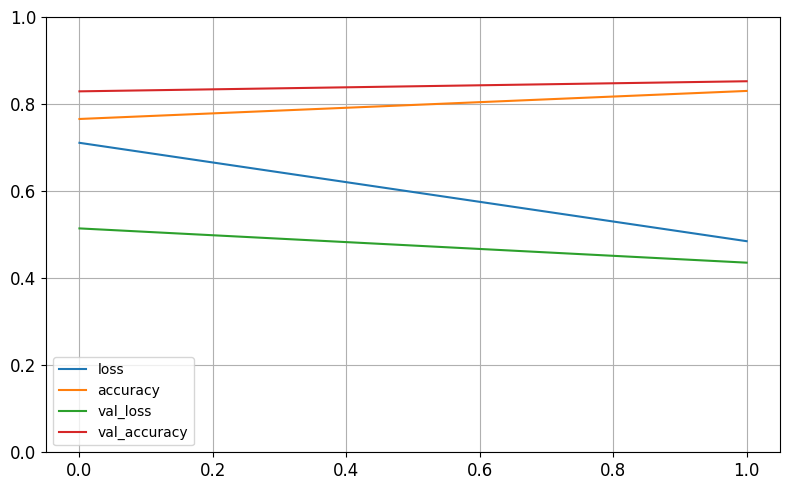

In [30]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
save_fig("keras_learning_curves_plot")
plt.show()

In [31]:
y_test.shape

(10000,)

In [91]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8806


[0.3393952250480652, 0.8805999755859375]

In [45]:
X_new = X_test[:3]
print(X_new.shape)
y_proba = model.predict(X_new)
y_proba.round(2) 

#As you can see, for each instance the model estimates one probability per class, from
#3class 0 to class 9. For example, for the first image it estimates that the probability of
#class 9 (ankle boot) is 79%, the probability of class 7 (sneaker) is 12%, the probability
#of class 5 (sandal) is 9%,

(3, 28, 28)
1/1 [==============================] - 0s 29ms/step


array([[0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.2, 0. , 0.8],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [93]:
# the batch size (it can be set in the fit() method using the
#batch_size argument, which defaults to 32).

In [94]:
#If you only care about the class with the highest estima‐
#ted probability (even if that probability is quite low) then you can use the pre
#dict_classes() method instead:


#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 14ms/step


array([9, 2, 1], dtype=int64)

In [95]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [96]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


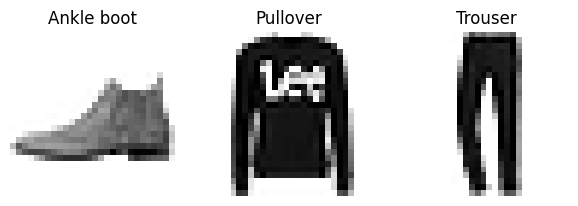

In [97]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [98]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [99]:
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6772 - val_loss: 0.7801
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7348 - val_loss: 0.7434
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6699 - val_loss: 0.6447
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5726
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5866 - val_loss: 0.5500
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5543 - val_loss: 0.5253
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5287 - val_loss: 0.4882
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4895 - val_loss: 0.4480
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4754 - val_loss: 0.4370

In [101]:
#Functional API

In [102]:
np.random.seed(42)
tf.random.set_seed(42)


input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [103]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [104]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5336 - val_loss: 7.4463
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7551 - val_loss: 1.1076
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6333 - val_loss: 0.9374
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6016 - val_loss: 0.7025
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5708 - val_loss: 0.5370
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5466 - val_loss: 0.5209
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5298 - val_loss: 0.5587
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5156 - val_loss: 0.5310
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5001 - val_loss: 0.5121
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4894 - val_loss: 0.4970

In [105]:
#But what if you want to send a subset of the features through the wide path, and a
#different subset (possibly overlapping) through the deep path (see Figure 10-14)? In
#this case, one solution is to use multiple inputs. For example, suppose we want to
#send 5 features through the deep path (features 0 to 4), and 6 features through the
#wide path (features 2 to 7):

In [106]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [107]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0251 - val_loss: 1.0327
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7478 - val_loss: 0.6947
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6567 - val_loss: 0.5995
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6000 - val_loss: 0.5588
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5568 - val_loss: 0.5153
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5232 - val_loss: 0.4802
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.4565
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4802 - val_loss: 0.4454
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4655 - val_loss: 0.4274
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4545 - val_loss: 0.4164

In [108]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [109]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [110]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.2029 - main_output_loss: 1.9532 - aux_output_loss: 4.4498 - val_loss: 1.1751 - val_main_output_loss: 0.9391 - val_aux_output_loss: 3.2993
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9463 - main_output_loss: 0.7681 - aux_output_loss: 2.5501 - val_loss: 0.8921 - val_main_output_loss: 0.7707 - val_aux_output_loss: 1.9843
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7867 - main_output_loss: 0.6760 - aux_output_loss: 1.7829 - val_loss: 0.7706 - val_main_output_loss: 0.6681 - val_aux_output_loss: 1.6934
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7151 - main_output_loss: 0.6284 - aux_output_loss: 1.4956 - val_loss: 0.6910 - val_main_output_loss: 0.5944 - val_aux_output_loss: 1.5598
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6719 - main_output_loss: 0.5941 - aux_output_loss: 1.3715 - val_loss

In [111]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 63ms/step


In [112]:
#Building Dynamic Models Using the Subclassing API

In [113]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [114]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.6137 - output_1_loss: 2.3215 - output_2_loss: 5.2428 - val_loss: 1.4020 - val_output_1_loss: 1.0246 - val_output_2_loss: 4.7981
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0115 - output_1_loss: 0.8049 - output_2_loss: 2.8714 - val_loss: 0.9206 - val_output_1_loss: 0.7711 - val_output_2_loss: 2.2663
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7611 - output_1_loss: 0.6347 - output_2_loss: 1.8985 - val_loss: 0.7131 - val_output_1_loss: 0.6164 - val_output_2_loss: 1.5836
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6653 - output_1_loss: 0.5724 - output_2_loss: 1.5017 - val_loss: 0.6186 - val_output_1_loss: 0.5385 - val_output_2_loss: 1.3402
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6169 - output_1_loss: 0.5391 - output_2_loss: 1.3167 - val_loss: 0.5770 - val_output_1_loss: 0.5047 - val_ou

In [115]:
#Saving and Restoring

In [116]:
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [118]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5642 - val_loss: 0.8028
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7086 - val_loss: 0.7121
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6466 - val_loss: 0.6120
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6041 - val_loss: 0.5662
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5718 - val_loss: 0.5309
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5447 - val_loss: 0.5069
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5222 - val_loss: 0.4948
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5034 - val_loss: 0.4683
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4868 - val_loss: 0.4527
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4613


In [119]:
model.save("my_keras_model.h5")

In [120]:
model = keras.models.load_model("my_keras_model.h5")

In [121]:
model.predict(X_new)

1/1 [==============================] - 0s 55ms/step


array([[0.7809552],
       [1.4423233],
       [3.2519305]], dtype=float32)

In [122]:
model.save_weights("my_keras_weights.ckpt")

In [123]:
model.load_weights("my_keras_weights.ckpt")

In [124]:
#Using Callbacks  used when you want to save at a contious time interval when your is very large

In [125]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

In [127]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


#the ModelCheckpoint callback saves checkpoints of your model at regular intervals during
#training, by default at the end of each epoch:

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8930 - val_loss: 0.8170
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6989 - val_loss: 0.6322
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5871
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5812 - val_loss: 0.5403
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5208
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5187 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4960 - val_loss: 0.4683
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4777 - val_loss: 0.4753
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4644
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4369


In [128]:
 #you can set
#save_best_only=True when creating the ModelCheckpoint. In this case, it will only
#save your model when its performance on the validation set is the best so far. This
#ay, you do not need to worry about training for too long and overfitting the training
#set: simply restore the last model saved after training

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                     save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
 validation_data=(X_valid, y_valid),
 callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4411 - val_loss: 0.4622
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4333 - val_loss: 0.5040
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4270 - val_loss: 0.4973
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4628
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4171 - val_loss: 0.4382
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4126 - val_loss: 0.5112
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4094 - val_loss: 0.4652
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4061 - val_loss: 0.4142
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4030 - val_loss: 0.4694
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.5086

In [129]:
#Another way to implement early stopping is to simply use the EarlyStopping call‐
# back. It will interrupt training when it measures no progress on the validation set for
# a number of epochs (defined by the patience argument)


early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                              restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
 validation_data=(X_valid, y_valid),
 callbacks=[checkpoint_cb, early_stopping_cb]) #can add 

#The number of epochs can be set to a large value since training will stop automati‐
#cally when there is no more progress. Moreover, there is no need to restore the best
#model saved in this case since the EarlyStopping callback will keep track of the best
#weights and restore them for us at the end of training.


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4030 - val_loss: 0.4470
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.5514
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3977 - val_loss: 0.5017
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3953 - val_loss: 0.4399
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3932 - val_loss: 0.4154
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3909 - val_loss: 0.4989
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3896 - val_loss: 0.4539
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3878 - val_loss: 0.3956
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3862 - val_loss: 0.4544
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3845 - val_lo

In [130]:
'''model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)'''

'model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))\nearly_stopping_cb = keras.callbacks.EarlyStopping(patience=10,\n                                                  restore_best_weights=True)\nhistory = model.fit(X_train, y_train, epochs=100,\n                    validation_data=(X_valid, y_valid),\n                    callbacks=[checkpoint_cb, early_stopping_cb])\nmse_test = model.evaluate(X_test, y_test)'

In [131]:
#If you need extra control, you can easily write your own custom callbacks. For exam‐
#ple, the following custom callback will display the ratio between the validation loss
#and the training loss during training (e.g., to detect overfitting):

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\n val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [132]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/3
331/363 [==========================>...] - ETA: 0s - loss: 0.3801
 val/train: 1.14
363/363 [==============================] - 1s 1ms/step - loss: 0.3818 - val_loss: 0.4358
Epoch 2/3
333/363 [==========================>...] - ETA: 0s - loss: 0.3773
 val/train: 1.43
363/363 [==============================] - 1s 2ms/step - loss: 0.3802 - val_loss: 0.5421
Epoch 3/3
341/363 [===========================>..] - ETA: 0s - loss: 0.3820
 val/train: 1.26
363/363 [==============================] - 1s 1ms/step - loss: 0.3794 - val_loss: 0.4787


In [133]:
#TensorBoard

In [134]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [135]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_12_03-23_14_13'

In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [137]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [138]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.6623 - val_loss: 0.7945
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7359 - val_loss: 0.7265
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6795 - val_loss: 0.6299
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6363 - val_loss: 0.5975
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6034 - val_loss: 0.5537
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5724 - val_loss: 0.5289
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5478 - val_loss: 0.5243
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5254 - val_loss: 0.4857
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5048 - val_loss: 0.4670
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4871 - val_loss: 0.4658

In [139]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16064), started 0:11:04 ago. (Use '!kill 16064' to kill it.)

In [140]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_12_03-23_14_34'

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [143]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.5462 - val_loss: 95.2151
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================]

In [144]:
#, this callback exported the computation graph and many useful statistics
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [145]:
#Hyperparameter Tuning

In [146]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [147]:
# The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden): # creating the number of hidden layer
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1)) #this is the output neuron
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [148]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Emakam leumassa\AppData\Local\Temp\ipykernel_11416\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [149]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3395 - val_loss: 45.5487
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0462 - val_loss: 4.5048
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5849 - val_loss: 1.2495
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5140 - val_loss: 0.8710
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4796 - val_loss: 0.6879
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4567 - val_loss: 0.5858
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4426 - val_loss: 0.5322
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4330 - val_loss: 0.4959
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.4678
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4202 - val_l

In [150]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3535


In [151]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 76ms/step


In [152]:
np.random.seed(42)
tf.random.set_seed(42)

In [153]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9325 - val_loss: 3.2118
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5102 - val_loss: 0.4441
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4483 - val_loss: 0.4040
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4312 - val_loss: 0.3929
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.3878
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4147 - val_loss: 0.3852
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4089 - val_loss: 0.3828
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4048 - val_loss: 0.3803
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4010 - val_loss: 0.7080
Epoch 10/100
242/242 [========

Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3940 - val_loss: 0.3629
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3937 - val_loss: 0.3619
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3934 - val_loss: 0.3612
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.3650
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3934 - val_loss: 0.3650
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3932 - val_loss: 0.3645
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3926 - val_loss: 0.3617
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3922 - val_loss: 0.3634
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3925 - val_loss: 0.3621
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3917

Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3391 - val_loss: 0.3377
Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3361 - val_loss: 0.3527
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3357 - val_loss: 0.3992
Epoch 25/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3334 - val_loss: 0.3194
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3324 - val_loss: 0.3355
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3297 - val_loss: 0.3850
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3288 - val_loss: 0.3357
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3276 - val_loss: 0.4224
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3272 - val_loss: 0.3511
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3245

Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4753 - val_loss: 0.4703
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.4680
Epoch 50/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4698 - val_loss: 0.4646
Epoch 51/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4672 - val_loss: 0.4627
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4647 - val_loss: 0.4633
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4623 - val_loss: 0.4629
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4600 - val_loss: 0.4608
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4578 - val_loss: 0.4597
Epoch 56/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4557 - val_loss: 0.4612
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4537

242/242 [==============================] - 0s 2ms/step - loss: 0.4052 - val_loss: 0.4364
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4002 - val_loss: 0.3838
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3955 - val_loss: 0.3727
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3914 - val_loss: 0.3686
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3873 - val_loss: 0.3769
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3940
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3806 - val_loss: 0.4031
Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3781 - val_loss: 0.4267
Epoch 21/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3759 - val_loss: 0.4495
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3733 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5096 - val_loss: 22.5804
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5088 - val_loss: 21.7286
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5110 - val_loss: 20.1625
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5099 - val_loss: 22.6743
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5068 - val_loss: 20.1874
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5086 - val_loss: 10.7405
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5082 - val_loss: 19.7683
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5049 - val_loss: 24.3521
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5077 - val_loss: 25.9685
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5199 - val_l

242/242 [==============================] - 0s 2ms/step - loss: 0.4175 - val_loss: 0.4237
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4165 - val_loss: 0.4098
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4108 - val_loss: 0.4260
Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4109 - val_loss: 0.3920
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4070 - val_loss: 0.4662
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4051 - val_loss: 0.3772
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4018 - val_loss: 0.4174
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4010 - val_loss: 0.3936
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3988 - val_loss: 0.4252
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 

121/121 [==============================] - 0s 1ms/step - loss: 0.4074
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=   9.8s
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8106 - val_loss: 2.7872
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7007 - val_loss: 2.7255
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6158 - val_loss: 1.4793
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5815 - val_loss: 1.1385
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5330 - val_loss: 0.5401
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5080 - val_loss: 0.5922
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4874 - val_loss: 0.4747
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4729 - val_loss: 0.4329
Epoch 9/100
242/242 [==========

Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3787 - val_loss: 0.3579
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3668 - val_loss: 0.4724
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3592 - val_loss: 0.7342
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3530 - val_loss: 0.9573
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3458 - val_loss: 1.1635
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3425 - val_loss: 0.6007
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3372 - val_loss: 0.8119
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3333 - val_loss: 0.7910
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3306 - val_loss: 1.1270
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3305 - va

242/242 [==============================] - 0s 2ms/step - loss: 0.4522 - val_loss: 3.5134
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4800 - val_loss: 5.3875
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4279 - val_loss: 1.2845
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3851 - val_loss: 0.5701
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3718 - val_loss: 0.4924
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3602 - val_loss: 0.3583
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3521 - val_loss: 0.3715
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3483 - val_loss: 0.3273
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3442 - val_loss: 0.3817
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3390 - val_loss: 0.3264

Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3012 - val_loss: 0.3494
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3015 - val_loss: 0.4439
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3004 - val_loss: 0.4950
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3005 - val_loss: 0.4657
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3007 - val_loss: 0.3614
Epoch 72/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3121
[CV] END learning_rate=0.004591455636549438, n_hidden=2, n_neurons=59; total time=  27.2s
Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7683 - val_loss: 1.9050
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4472 - val_loss: 0.7705
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3901 - val_loss: 0.3673
Epoch 4/100
36

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016F9986E710>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.005021425736625637,
                                                          0.0005703073595961105,
                                                          0.001151888789941251,
                                                          0.001621231156394198,
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.0032032448128444043,
                                                          0.004591455636549438,
                                                          0.0003715541189658278, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [154]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [155]:
rnd_search_cv.best_estimator_

In [156]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2774


-0.2774026691913605

In [157]:
model = rnd_search_cv.best_estimator_.model
model

In [158]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2774


0.2774026691913605

In [159]:
#Exercise

In [160]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 562s 49us/step


In [161]:
X_train_full.shape

(60000, 28, 28)

In [162]:
X_train_full.dtype

#Each pixel intensity is also represented as a byte (0 to 255):

dtype('uint8')

In [164]:
#Let's split the full training set into a validation set and a (smaller) training set.
#We also scale the pixel intensities down to the 0-1 range and
#convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.


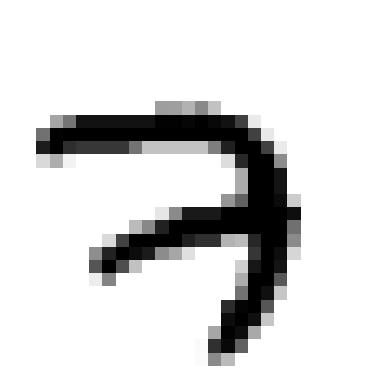

In [169]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [170]:
y_train


array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [171]:
X_valid.shape

(5000, 28, 28)

In [172]:
X_test.shape


(10000, 28, 28)

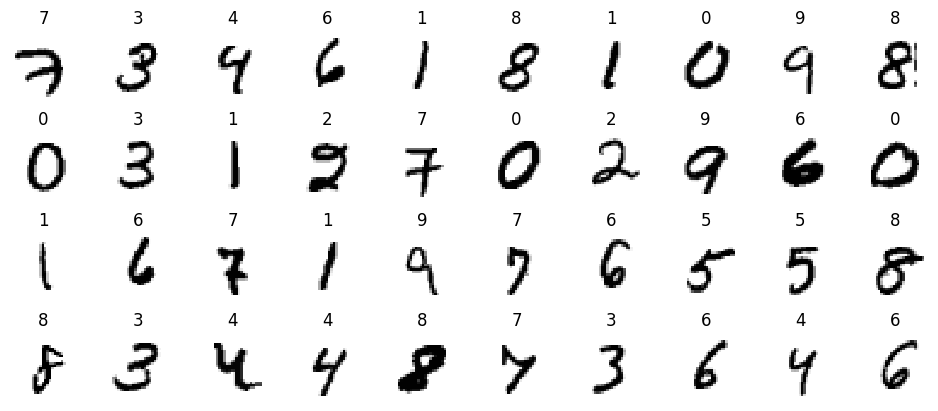

In [173]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [174]:

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)


In [175]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [176]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [178]:
#We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)


In [179]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])


1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.5923 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

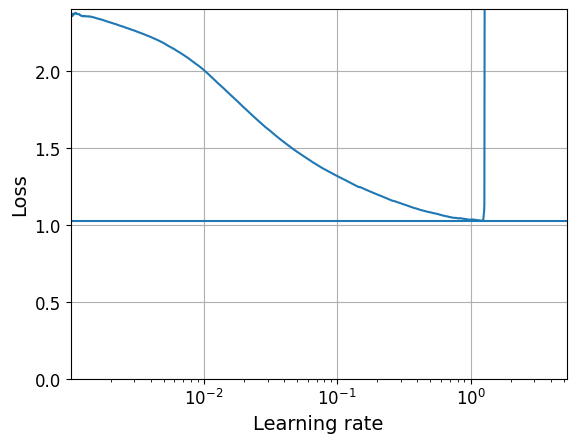

In [180]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [181]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [182]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [183]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [184]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir


'.\\my_mnist_logs\\run_001'

In [185]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2331 - accuracy: 0.9275 - val_loss: 0.1066 - val_accuracy: 0.9694
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0995 - val_accuracy: 0.9720
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0654 - accuracy: 0.9789 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0857 - val_accuracy: 0.9778
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.0930 - val_accuracy: 0.9760
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0764 - val_accuracy: 0.9792
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0928 - val_ac

In [186]:

model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 2.9762 - accuracy: 0.0892


[2.976170301437378, 0.08919999748468399]

In [ ]:
#We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [187]:
%tensorboard --logdir=./my_mnist_logs --port=6006

In [3]:
import os
import struct
import hashlib
import pycryptodome

def encrypt_file(key, in_filename, out_filename=None, chunksize=64*1024, mode='encrypt'):
    if not out_filename:
        if mode == 'encrypt':
            out_filename = in_filename + '.enc'
        elif mode == 'decrypt':
            out_filename = os.path.splitext(in_filename)[0]

    iv = b'\x00' * 16
    if mode == 'encrypt':
        iv = os.urandom(16)

    if mode == 'decrypt':
        filesize = os.path.getsize(in_filename)
        with open(in_filename, 'rb') as infile:
            iv = infile.read(16)

    encryptor = AES.new(key, AES.MODE_CBC, iv)

    with open(in_filename, 'rb') as infile:
        with open(out_filename, 'wb') as outfile:
            if mode == 'encrypt':
                outfile.write(struct.pack('<Q', os.path.getsize(in_filename)))
                outfile.write(iv)
            else:
                infile.seek(16)

            while True:
                chunk = infile.read(chunksize)
                if len(chunk) == 0:
                    break
                elif len(chunk) % 16 != 0:
                    chunk += b' ' * (16 - len(chunk) % 16)

                if mode == 'encrypt':
                    outfile.write(encryptor.encrypt(chunk))
                elif mode == 'decrypt':
                    outfile.write(encryptor.decrypt(chunk))

            if mode == 'decrypt':
                outfile.truncate(filesize - struct.unpack('<Q', outfile.read(struct.calcsize('Q')))[0])
                outfile.close()

# Example usage:
password = 'LEBGLEBG'
key = hashlib.sha256(password.encode()).digest()
input_file = '"D:\DUOLINGO\7 Things You Must Not Do on the Duolingo English Test.mp4"'
output_file = '"D:\DUOLINGO\7 Things You Must Not Do on the Duolingo English Test.mp4"'
encrypt_file(key, input_file, output_file, mode='encrypt')


ModuleNotFoundError: No module named 'pycryptodome'

In [74]:
import os
import struct
import hashlib
from cryptography.fernet import Fernet 



'''key = Fernet.generate_key()
print(key)'''

def encrypt_file(key, in_filename, out_filename=None, chunksize=64*1024, mode='encrypt'):
    if not out_filename:
        if mode == 'encrypt':
            out_filename = in_filename + '.enc'
        elif mode == 'decrypt':
            out_filename = os.path.splitext(in_filename)[0]

    iv = os.urandom(16) #this is like the id of the file in the computer

    if mode == 'decrypt':
        filesize = os.path.getsize(in_filename)
        with open(in_filename, 'rb') as infile:
            iv = infile.read(16) #retreive the id of the encrypted file

    fernet = Fernet(key)# creation of the key to fit in th token

    with open(in_filename, 'rb') as infile: #open the file in read mode
        with open(out_filename, 'wb') as outfile: #in the read mode file the code now open a write mode file
            if mode == 'encrypt':
                outfile.write(struct.pack('<Q', os.path.getsize(in_filename)))
                outfile.write(iv)    #for the id i will use to place to writing mode of the file
            else:
                infile.seek(16)

            while True:
                chunk = infile.read(chunksize) # it seems like the chunksixze id is not corresponding to the write size
                if len(chunk) == 0:
                    break
                elif len(chunk) % 16 != 0:
                    chunk += b' ' * (16 - len(chunk) % 16)

                if mode == 'encrypt':
                    outfile.write(fernet.encrypt(chunk))
                elif mode == 'decrypt':
                    outfile.write(fernet.decrypt(chunk)) 

            if mode == 'decrypt':
                outfile.truncate(filesize - struct.unpack('<Q', outfile.read(struct.calcsize('Q')))[0])
                outfile.close()

# Example usage:
#password = b'LEBGLEBG'
#key = hashlib.sha256(password).digest()
key = b'326V0ImHRzc5m6JLfruUMVBC1uIPYGk6o_C2Cn7pUyU='
input_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4'
output_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice1.enc'
encrypt_file(key, input_file, output_file, mode='encrypt')

'''from cryptography.fernet import Fernet
key =  Fernet.generate_key()
f = Fernet(key)
token = f.encrypt(b"hello world")
print(token)
print(f.decrypt(token))'''




UnsupportedOperation: write

In [ ]:
import os
import struct
import hashlib
from cryptography.fernet import Fernet 

def encrypt_file(key, in_filename, out_filename=None, chunksize=64*1024, mode='encrypt'):
     if not out_filename:
        if mode == 'encrypt':
            out_filename = in_filename + '.enc'
        elif mode == 'decrypt':
            out_filename = os.path.splitext(in_filename)[0]
            

In [5]:
from cryptography.fernet import Fernet

# Generate a key
key = Fernet.generate_key()
print(key)
# Save the key to a file
with open('key.txt', 'wb') as key_file:
    key_file.write(key)

# Load the key from the file
with open('key.txt', 'rb') as key_file:
    key = key_file.read()

# Create a Fernet object with the key
fernet = Fernet(key)

# Encrypt a file
input_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4'
output_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.enc'

with open(input_file, 'rb') as f:
    data = f.read()

encrypted_data = fernet.encrypt(data)

with open(output_file, 'wb') as f:
    f.write(encrypted_data)

print(f'File {input_file} encrypted and saved as {output_file}')


b'M_liZecL6MgZW01Ps4RWwgfFyOHeCNxw5WT69d_D5K0='
File D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.enc


In [6]:
from cryptography.fernet import Fernet

# Generate a key
key = Fernet.generate_key()

# Save the key to a file
with open('key.txt', 'wb') as key_file:
    key_file.write(key)

# Load the key from the file
with open('key.txt', 'rb') as key_file:
    key = key_file.read()

# Create a Fernet object with the key
fernet = Fernet(b'M_liZecL6MgZW01Ps4RWwgfFyOHeCNxw5WT69d_D5K0=')

# Encrypt a file
input_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4'
encrypted_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.enc'

with open(input_file, 'rb') as f:
    data = f.read()

encrypted_data = fernet.encrypt(data)

with open(encrypted_file, 'wb') as f:
    f.write(encrypted_data)

print(f'File {input_file} encrypted and saved as {encrypted_file}')

# Decrypt the encrypted file
decrypted_file = 'D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice1.mp4'

with open(encrypted_file, 'rb') as f:
    encrypted_data = f.read()

decrypted_data = fernet.decrypt(encrypted_data)

with open(decrypted_file, 'wb') as f:
    f.write(decrypted_data)

print(f'Encrypted file {encrypted_file} decrypted and saved as {decrypted_file}')


File D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.enc
Encrypted file D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.enc decrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice1.mp4


In [ ]:
from cryptography.fernet import Fernet

class FernetEncryptor:
    def __init__(self, key_file = None, key = None):
        # Load or generate a key
        try:
            with open(key_file, 'rb') as f:
                self.key = f.read()
        except FileNotFoundError:
            self.key = Fernet.generate_key()
            with open(key_file, 'wb') as f:
                f.write(self.key)
                
        # Create a Fernet object with the key
        self.fernet = Fernet(self.key)
        
    def encrypt_file(self, input_file, output_file):
        # Encrypt a file
        with open(input_file, 'rb') as f:
            data = f.read()
            
        encrypted_data = self.fernet.encrypt(data)

        with open(output_file, 'wb') as f:
            f.write(encrypted_data)

        print(f'File {input_file} encrypted and saved as {output_file}')
        
    def decrypt_file(self, input_file, output_file):
        # Decrypt the encrypted file
        with open(input_file, 'rb') as f:
            encrypted_data = f.read()
            
        decrypted_data = self.fernet.decrypt(encrypted_data)

        with open(output_file, 'wb') as f:
            f.write(decrypted_data)

        print(f'Encrypted file {input_file} decrypted and saved as {output_file}')
        
    def decrypt_file_chunked(self, input_file, output_file, chunk_size=1024*1024):
        # Decrypt the encrypted file in chunks
        with open(input_file, 'rb') as encrypted_file:
            with open(output_file, 'wb') as decrypted_file:
                while True:
                    chunk = encrypted_file.read(chunk_size)
                    if not chunk:
                        break
                    decrypted_chunk = self.fernet.decrypt(chunk)
                    decrypted_file.write(decrypted_chunk)

        print(f'Encrypted file {input_file} decrypted and saved as {output_file} in chunks')

        
        
# Create a new FernetEncryptor object with the key file 'key.txt'
encryptor = FernetEncryptor('key.txt')

# Encrypt a file
encryptor.encrypt_file('example.mp4', 'example.encrypted')

# Decrypt a file
encryptor.decrypt_file('example.encrypted', 'example_decrypted.mp4')

# Decrypt a file in chunks
encryptor.decrypt_file_chunked('example.encrypted', 'example_decrypted_chunked.mp4', chunk_size=1024*1024)


In [ ]:
import os
import shutil
import pyudev

# Set the directory containing the code to copy
code_dir = '/home/user/my_code/'

# Set the directory on the USB device to copy the code to
usb_dir = '/media/usb/MyCode/'

# Create a pyudev context and monitor for block devices
context = pyudev.Context()
monitor = pyudev.Monitor.from_netlink(context)
monitor.filter_by('block')

# Wait for a USB device to be plugged in
for device in iter(monitor.poll, None):
    if device.action == 'add' and 'ID_BUS' in device and device['ID_BUS'] == 'usb':

        # Get the device path (e.g. /dev/sdb1)
        device_path = device.device_node
        
        # Mount the device to the USB directory
        os.makedirs(usb_dir, exist_ok=True)
        os.system(f'mount {device_path} {usb_dir}')

        # Copy the code to the USB directory
        shutil.copytree(code_dir, os.path.join(usb_dir, os.path.basename(code_dir)))

        # Unmount the device
        os.system(f'umount {device_path}')


In [ ]:
import os

def delete_file_or_folder(path):
    if os.path.isfile(path):
        os.remove(path)
        print(f"File {path} deleted.")
    elif os.path.isdir(path):
        os.rmdir(path)
        print(f"Folder {path} deleted.")
    else:
        print(f"{path} is not a valid file or folder.")

# Example usage
delete_file_or_folder("example.txt")  # Delete a file
delete_file_or_folder("example_folder")  # Delete a folder
delete_file_or_folder("nonexistent_file")  # Try to delete a nonexistent file


In [4]:
import os
import time

def is_usb_connected():
    """Check if a USB drive is currently connected to the computer"""
    drives = []
    for drive in range(65, 91):
        drive_letter = chr(drive) + ':'
        if os.path.exists(drive_letter):
            drives.append(drive_letter)
    for drive in drives:
        if 'removable' in GetDriveType(drive):
            return True
    return False

# example usage
while True:
    if is_usb_connected():
        print("USB drive detected!")
    else:
        print("USB drive not detected")
    time.sleep(1)


NameError: name 'GetDriveType' is not defined

In [3]:
import os
import urllib.request
import pyudev

# Set the URL to download the file from
file_url = 'http://example.com/file.txt'

# Set the directory on the USB device to save the file to
usb_dir = '/media/usb/Downloads/'

# Create a pyudev context and monitor for block devices
context = pyudev.Context()
monitor = pyudev.Monitor.from_netlink(context)
monitor.filter_by('block')

# Wait for a USB device to be plugged in
for device in iter(monitor.poll, None):
    if device.action == 'add' and 'ID_BUS' in device and device['ID_BUS'] == 'usb':

        # Get the device path (e.g. /dev/sdb1)
        device_path = device.device_node
        
        # Mount the device to the USB directory
        os.makedirs(usb_dir, exist_ok=True)
        os.system(f'mount {device_path} {usb_dir}')

        # Download the file and save it to the USB directory
        file_name = os.path.basename(file_url)
        file_path = os.path.join(usb_dir, file_name)
        urllib.request.urlretrieve(file_url, file_path)

        # Unmount the device
        os.system(f'umount {device_path}')

        
        
        
        
import tkinter as tk

root = tk.Tk()
root.title("Display Message")
root.geometry("300x100")

message = tk.Label(root, text="I am a good man")
message.pack()

root.mainloop()

ModuleNotFoundError: No module named 'pyudev'

In [ ]:
You can run the program in the background on Linux by adding an ampersand (&) at the end of the command when you run it:

Copy code
python my_program.py &
This will run the program in the background, allowing you to continue using the terminal while the program is running.

If you want to run the program automatically when your computer starts up, you can add it to the system's list of startup programs. The process for doing this varies depending on your operating system and desktop environment. Here are some general steps:

Create a desktop entry file for your program. For example, you could create a file called my_program.desktop with the following contents:

    

[Desktop Entry]
Type=Application
Exec=/usr/bin/python /path/to/my_program.py
Hidden=false
NoDisplay=false
X-GNOME-Autostart-enabled=true
Name=My Program
Comment=My Program Description




Adjust the Exec line to point to the location of your Python interpreter and your program file.

Copy the desktop entry file to one of the system's autostart directories. For example, you could copy it to /etc/xdg/autostart for a system-wide startup program, or ~/.config/autostart for a per-user startup program.

Make the desktop entry file executable by running chmod +x /path/to/my_program.desktop.

After doing this, your program should automatically run in the background when your computer starts up.

In [ ]:
An autorun.inf file is a simple text file that can be created using a plain text editor such as Notepad. It is used to specify which executable file(s) should be run automatically when a USB drive is inserted into a computer. Here are the steps to create an autorun.inf file:

Connect your USB drive to your computer and create a new text file.

Rename the file to autorun.inf. If Windows warns you that changing the file name extension could make the file unusable, click Yes to confirm the change.

Open the autorun.inf file in a text editor and add the following lines:


[autorun]
open=your_program.exe
icon=your_icon.ico


Replace your_program.exe with the name of the executable file you want to run automatically, and your_icon.ico with the name of the icon file you want to use for the USB drive.

Save and close the autorun.inf file.

Note that autorun.inf files have been disabled on many modern operating systems for security reasons. Therefore, it is recommended to use alternative methods to perform any desired actions upon USB insertion.

In [1]:
import os
from cryptography.fernet import Fernet

class FernetEncryptor:
    def __init__(self, key_file = None, key = None):
        # Load or generate a key
        self.key1 = key
        try:
            with open(key_file, 'rb') as f:
                self.key = f.read()
        except FileNotFoundError:
             if self.key1 == None:
                self.key = Fernet.generate_key()
                with open(key_file, 'wb') as f:
                    f.write(self.key)

        # Create a Fernet object with the key
        self.key1 = self.key
        self.fernet = Fernet(self.key1)
        
    def encrypt_file(self, input_file, output_file):
        # Encrypt a file
        with open(input_file, 'rb') as f:
            data = f.read()
            
        encrypted_data = self.fernet.encrypt(data)

        with open(output_file, 'wb') as f:
            f.write(encrypted_data)

        print(f'File {input_file} encrypted and saved as {output_file}')
        
    def decrypt_file(self, input_file, output_file):
        # Decrypt the encrypted file
        with open(input_file, 'rb') as f:
            encrypted_data = f.read()
            
        decrypted_data = self.fernet.decrypt(encrypted_data)

        with open(output_file, 'wb') as f:
            f.write(decrypted_data)

        print(f'Encrypted file {input_file} decrypted and saved as {output_file}')
        
    def decrypt_file_chunked(self, input_file, output_file, chunk_size=1024*1024):
        # Decrypt the encrypted file in chunks
        with open(input_file, 'rb') as encrypted_file:
            with open(output_file, 'wb') as decrypted_file:
                while True:
                    chunk = encrypted_file.read(chunk_size)
                    if not chunk:
                        break
                    decrypted_chunk = self.fernet.decrypt(chunk)
                    decrypted_file.write(decrypted_chunk)

        print(f'Encrypted file {input_file} decrypted and saved as {output_file} in chunks')

    def encrypt_folder(self, input_folder, output_folder):
        # Encrypt all files in the input folder and save them to the output folder
        for root, dirs, files in os.walk(input_folder):
            for file in files:
                print(file)
                input_file = os.path.join(root, file)
                output_file = os.path.join(output_folder, os.path.relpath(input_file, input_folder))
                self.encrypt_file(input_file, output_file)

        print(f'Folder {input_folder} encrypted and saved to {output_folder}')
        
    def decrypt_folder(self, input_folder, output_folder):
        # Decrypt all files in the input folder and save them to the output folder
        for root, dirs, files in os.walk(input_folder):
            for file in files:
                input_file = os.path.join(root, file)
                output_file = os.path.join(output_folder, os.path.relpath(input_file, input_folder))
                self.decrypt_file(input_file, output_file)

        print(f'Folder {input_folder} decrypted and saved to {output_folder}')


In [2]:
encryption =  FernetEncryptor('D:\keyfile')

In [2]:
encryption.encrypt_file("D:\emilie phone\RAPPORT DE STAGE ASECNA.docx","D:\emilie phone\RAPPORT DE STAGE ASECNA.enc")

File D:\emilie phone\RAPPORT DE STAGE ASECNA.docx encrypted and saved as D:\emilie phone\RAPPORT DE STAGE ASECNA.enc


In [4]:
encryption.decrypt_file("D:\emilie phone\RAPPORT DE STAGE ASECNA.enc", "D:\emilie phone\RAPPORT DE STAGE ASECNA1.docx")

Encrypted file D:\emilie phone\RAPPORT DE STAGE ASECNA.enc decrypted and saved as D:\emilie phone\RAPPORT DE STAGE ASECNA1.docx


In [3]:
encryption.encrypt_folder('D:\DUOLINGO','D:\DUOLINGO')

Duolingo English Test Practice - Write About The Photo.mp4
File D:\DUOLINGO\Duolingo English Test Practice - Write About The Photo.mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test Practice - Write About The Photo.mp4
Duolingo English Test Writing 50 Words Lesson 2 Writing a Recount.mp4
File D:\DUOLINGO\Duolingo English Test Writing 50 Words Lesson 2 Writing a Recount.mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test Writing 50 Words Lesson 2 Writing a Recount.mp4
Duolingo English Test Writing Course - Study and practice.mp4
File D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4
Duolingo English Test WRITING Practice Questions and Answers for 2022 (1+ Hour).mp4
File D:\DUOLINGO\Duolingo English Test WRITING Practice Questions and Answers for 2022 (1+ Hour).mp4 encrypted and saved as D:\DUOLINGO\Duolingo English Test WRITING Practice Questions an

In [4]:
encryption.decrypt_folder('D:\DUOLINGO','D:\DUOLINGO')

Encrypted file D:\DUOLINGO\Duolingo English Test Practice - Write About The Photo.mp4 decrypted and saved as D:\DUOLINGO\Duolingo English Test Practice - Write About The Photo.mp4
Encrypted file D:\DUOLINGO\Duolingo English Test Writing 50 Words Lesson 2 Writing a Recount.mp4 decrypted and saved as D:\DUOLINGO\Duolingo English Test Writing 50 Words Lesson 2 Writing a Recount.mp4
Encrypted file D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4 decrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Course - Study and practice.mp4
Encrypted file D:\DUOLINGO\Duolingo English Test WRITING Practice Questions and Answers for 2022 (1+ Hour).mp4 decrypted and saved as D:\DUOLINGO\Duolingo English Test WRITING Practice Questions and Answers for 2022 (1+ Hour).mp4
Encrypted file D:\DUOLINGO\Duolingo English Test Writing Writing about a picture SUPER TIPS & Answers.mp4 decrypted and saved as D:\DUOLINGO\Duolingo English Test Writing Writing about a picture SUPER T

In [5]:
import tkinter as tk

root = tk.Tk()
root.title("Display Message")
root.geometry("300x100")

message = tk.Label(root, text="I am a good man")
message.pack()

root.mainloop()

In [ ]:
import inspect
import ast

def add_numbers(x, y):
return x + y

def change_code():
# get the source code of the add_numbers function
source = inspect.getsource(add_numbers)
# parse the source code into an AST
tree = ast.parse(source)
# loop through the nodes in the AST
for node in ast.walk(tree):
    # check for a node that represents the add operator
    if isinstance(node, ast.Add):
        # change the node to represent the subtract operator
        node.__class__ = ast.Sub
    
# compile the modified AST into a code object
code = compile(tree, '<string>', 'exec')
# create a new function from the modified code object
new_func = types.FunctionType(code.co_consts[0], globals())

# replace the original add_numbers function with the new function
globals()['add_numbers'] = new_func





#this is from different folder contents of file my_module.py
def add_numbers(x, y):
    return x + y

# contents of main.py
import inspect
import ast
import types
import my_module

# get the source code of the add_numbers function
source = inspect.getsource(my_module.add_numbers)

# parse the source code into an AST
tree = ast.parse(source)

# loop through the nodes in the AST
for node in ast.walk(tree):
    # check for a node that represents the add operator
    if isinstance(node, ast.Add):
        # change the node to represent the subtract operator
        node.__class__ = ast.Sub

# compile the modified AST into a code object
code = compile(tree, '<string>', 'exec')

# create a new function from the modified code object
new_func = types.FunctionType(code.co_consts[0], my_module.__globals__)

# replace the original add_numbers function with the new function
my_module.add_numbers = new_func


In [ ]:
#include <iostream>

int add(int x, int y) {
    return x + y;
}

int main() {
    int result = add(2, 3);
    std::cout << "Result: " << result << std::endl;
    return 0;
}


import clang.cindex
import os

# set up the Clang library
clang.cindex.Config.set_library_file('/usr/local/Cellar/llvm/12.0.0_1/lib/libclang.dylib')

# define the source code we want to modify
source_code = """
#include <iostream>

int add(int x, int y) {
    return x + y;
}

int main() {
    int result = add(2, 3);
    std::cout << "Result: " << result << std::endl;
    return 0;
}
"""

# parse the source code into an AST
index = clang.cindex.Index.create()
translation_unit = index.parse('test.cpp', args=['-x', 'c++'], unsaved_files=[('test.cpp', source_code)])
root = translation_unit.cursor

# find the 'add' function and modify its code
for c in root.walk_preorder():
    if c.kind == clang.cindex.CursorKind.FUNCTION_DECL and c.spelling == 'add':
        for node in c.get_children():
            if node.kind == clang.cindex.CursorKind.BINARY_OPERATOR and node.operator == '+':
                node.operator = '-'

# generate the modified source code from the AST
modified_source = translation_unit.spelling

# compile and run the modified code
with open('modified.cpp', 'w') as f:
    f.write(modified_source)

os.system('clang++ modified.cpp -o modified')
os.system('./modified')




In [ ]:
from problog.program import PrologString
from problog import get_evaluatable


with open('buggy_program.py', 'r') as file:
    buggy_code = file.read()

# Define the original buggy program
program_string = """
person(john).
person(jane).
person(jim).
likes(john, X) :- person(X).
likes(X, Y) :- likes(X, Z), likes(Z, Y).
"""
original_program = PrologString(program_string)

# Define the constraints for the new program
constraints_string = """
person(john).
person(jane).
person(jim).
likes(john, X) :- person(X).
likes(X, Y) :- likes(X, Z), likes(Z, Y).
not(likes(X, X)).
"""
constraints_program = PrologString(constraints_string)

# Generate the new program using program synthesis
synthesizer = get_evaluatable().create_synthesizer(original_program, constraints_program)
new_program = synthesizer.generate()

# Print the new program
print(new_program)





import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.utils import np_utils

# Load data
with open('data.txt', 'r') as f:
    data = f.read()

# Map characters to integers
chars = sorted(list(set(data)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

# Prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, len(data) - seq_length, 1):
    seq_in = data[i:i + seq_length]
    seq_out = data[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)

# Reshape input to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# Normalize input
X = X / float(len(chars))

# One hot encode the output variable
y = np_utils.to_categorical(dataY)

# Define the model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Train the model
model.fit(X, y, epochs=50, batch_size=128)

# Generate a sequence of characters
start_index = np.random.randint(0, len(dataX)-1)
pattern = dataX[start_index]
print("Seed:")
print("\"", ''.join([chars[value] for value in pattern]), "\"")
for i in range(1000):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(chars))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = chars[index]
    seq_in = [chars[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\nDone.")




In [ ]:
import importlib

# define a function to import a module dynamically
def import_module(module_name):
    # use the importlib module to import the specified module
    module = importlib.import_module(module_name)
    # return the imported module
    return module

# use the function to import the math module dynamically
math_module = import_module('math')

# use a function from the math module
x = math_module.sqrt(25)
print(x)


In [ ]:
import shutil

# get the name of the current file
filename = __file__

# specify the name of the new file
new_filename = 'copy_of_' + filename

# use shutil to copy the current file to the new file
shutil.copyfile(filename, new_filename)


In [2]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording...")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Finished recording.")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


Recording...
Finished recording.


In [1]:
import cv2

# Set up the video capture device
cap = cv2.VideoCapture(0)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480)) #640, 480

while True:
    # Capture a frame from the video stream
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output video
        out.write(frame)

        # Display the captured frame
        cv2.imshow('frame', frame)

    # Exit the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
batch_size = 16
seq_len = 64#128

d_k = 128 #256 #128
d_v = 256#256  #128
n_heads = 6#12 #1
ff_dim = 64#256 #64
     

class Time2Vector(Layer):
      def __init__(self, seq_len, **kwargs):
        super(Time2Vector, self).__init__()
        self.seq_len = seq_len

      def build(self, input_shape):
        '''Initialize weights and biases with shape (batch, seq_len)'''
        self.weights_linear = self.add_weight(name='weight_linear',
                                    shape=(int(self.seq_len),),
                                    initializer='uniform',
                                    trainable=True)

        self.bias_linear = self.add_weight(name='bias_linear',
                                    shape=(int(self.seq_len),),
                                    initializer='uniform',
                                    trainable=True)

        self.weights_periodic = self.add_weight(name='weight_periodic',
                                    shape=(int(self.seq_len),),
                                    initializer='uniform',
                                    trainable=True)

        self.bias_periodic = self.add_weight(name='bias_periodic',
                                    shape=(int(self.seq_len),),
                                    initializer='uniform',
                                    trainable=True)

      def call(self, x):
        '''Calculate linear and periodic time features'''
        x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
        time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
        time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)

        time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
        time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
        return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)

      def get_config(self): # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'seq_len': self.seq_len})
        return config

class PositionalEncoding(Layer):
    def __init__(self, max_seq_len, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.max_seq_len = max_seq_len
        self.d_model = d_model
        self.encoding = self._get_positional_encoding()

    def _get_positional_encoding(self):
        position = np.arange(self.max_seq_len)[:, np.newaxis]
        div_term = np.exp(np.arange(0, self.d_model, 2) * -(np.log(10000.0) / self.d_model))
        sin_term = np.sin(position * div_term)
        cos_term = np.cos(position * div_term)
        encoding = np.concatenate([sin_term, cos_term], axis=-1)
        encoding = encoding[np.newaxis, ...]
        return tf.cast(encoding, dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.encoding[:, :tf.shape(inputs)[1], :19]
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'max_seq_len': self.max_seq_len,
            'd_model': self.d_model
        })
        return config



class SingleAttention_longterm(Layer):
  def __init__(self, d_k, d_v, filters = 9, kernel_size = 16): #9
    super(SingleAttention_longterm, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.filters = filters 
    self.kernel_size = kernel_size

  def build(self, input_shape):
    pad_len = self.kernel_size // 2
    self.query = Conv1D(self.filters, self.kernel_size, activation='tanh', padding='valid', input_shape=input_shape)
    
    self.key = Conv1D(self.filters, self.kernel_size, activation='tanh', padding='valid', input_shape=input_shape)
    
    self.value = Conv1D(self.filters, self.kernel_size, activation='tanh', padding='valid', input_shape=input_shape)
    
    self.wq = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    
    self.wk = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.wv = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
       
    #self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
    
    #self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        
  def call(self, inputs, mask): # inputs = (in_seq, in_seq, in_seq)
    c_q = self.query(inputs[0])
    
    c_k = self.key(inputs[1])
    
    c_v = self.value(inputs[2])
    
    pad_len = self.kernel_size // 2
    c_q = tf.pad(c_q, [[0,0], [pad_len, pad_len], [0,0]], "CONSTANT")
    c_k = tf.pad(c_k, [[0,0], [pad_len, pad_len], [0,0]], "CONSTANT")
    c_v = tf.pad(c_v, [[0,0], [pad_len, pad_len], [0,0]], "CONSTANT")
    
    q = self.wq(c_q[:,:64,:])
    
    k = self.wk(c_k[:,:64,:])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    if mask is not None:
        mask = tf.cast(mask, tf.float32)
        attn_weights += (mask * -1e10)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.wv(c_v[:,:64,:]) 
    
    attn_out = tf.matmul(attn_weights, v)
    
    # perform padding to restore the original shape
    
    return attn_out

class SingleAttention_shortterm(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention_shortterm, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    

  def call(self, inputs, mask): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])
    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    if mask is not None:
        mask = tf.cast(mask, tf.float32)
        attn_weights += (mask * -1e10)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out

#############################################################################
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads, dropout = 0.1):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    for n in range(self.n_heads):
        if n%3 == 0:
            self.attn_heads.append(SingleAttention_longterm(self.d_k, self.d_v)) 
        else:
            self.attn_heads.append(SingleAttention_shortterm(self.d_k, self.d_v)) 
            
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6) #6

    self.cnn = Conv2D(filters=1, kernel_size=(3, 3), padding='same')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')
    
    
  def call(self, inputs, mask):
    attn = [self.attn_heads[i](inputs, mask) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)    
    #cnn_input = tf.expand_dims(inputs[0], axis=-1)  # Add a new dimension at the end
    #cnn_output = self.cnn(cnn_input)
    #cnn_output = tf.squeeze(cnn_output, axis=-1)  # Remove the last dimension
    #gate = tf.keras.activations.sigmoid(cnn_output)
    multi_linear = self.attn_dropout(multi_linear)
    multi_linear = multi_linear 
    return multi_linear          #tf.multiply(multi_linear, cnn_output)


#############################################################################
class TransformerEncoder(Layer):
    def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.09, **kwargs):
        super(TransformerEncoder, self).__init__()
        self.d_k = d_k
        self.d_v = d_v
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.attn_heads = list()
        self.dropout_rate = dropout
       
    
    def build(self, input_shape):
        
        self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
        
        
        self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=3, padding='same', activation='tanh')
        self.ff_conv1D_2 = Conv1D(filters=21, kernel_size=1, padding='same', activation='linear') #9 # New layer
       
        self.attn_dropout = Dropout(self.dropout_rate)
        self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-9)

        self.ff_dropout = Dropout(self.dropout_rate)
        self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-9)    
        
        self.linear = Dense(input_shape[0][-1], 
                            input_shape=input_shape, 
                            kernel_initializer='glorot_uniform', 
                            bias_initializer='glorot_uniform')
        
        self.cnn = Conv1D(filters=self.ff_dim, kernel_size=3, padding='same', activation='linear')
        #self.rnn = LSTM(7, return_sequences=True)
   
    def call(self, inputs, mask = None): # inputs = (in_seq, in_seq, in_seq)
        
        
        attn_layer = self.attn_multi(inputs, mask)
        attn_layer = self.attn_dropout(attn_layer)
        attn_layer = self.attn_normalize(inputs[0] + attn_layer)

        cnn_layer = self.cnn(attn_layer)
        cnn_layer = self.ff_conv1D_1(cnn_layer) # Pass through the new layer
        cnn_layer = self.ff_conv1D_2(cnn_layer)
  
        ff_layer = self.linear(attn_layer)
        ff_layer = tf.keras.activations.sigmoid(ff_layer)
        ff_layer = cnn_layer * ff_layer
        ff_layer = self.ff_dropout(ff_layer)
        attn_layer = self.attn_normalize(attn_layer + ff_layer)

        return  attn_layer
 
    def get_config(self): # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'d_k': self.d_k,
                       'd_v': self.d_v,
                       'n_heads': self.n_heads,
                       'ff_dim': self.ff_dim,
                       'attn_heads': self.attn_heads,
                       'dropout_rate': self.dropout_rate})
        return config   
    
    
class TransformerDecoder(Layer):
    def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
        super(TransformerDecoder, self).__init__()
        self.d_k = d_k
        self.d_v = d_v
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout

        self.attn_heads = list()

    def build(self, input_shape):
        self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
        
        self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=3, padding='same', activation='tanh')
        self.ff_conv1D_2 = Conv1D(filters=21, kernel_size=1, padding='same', activation='linear') #9
        
        self.attn_dropout = Dropout(self.dropout_rate)
        self.attn_normalize = LayerNormalization(epsilon=1e-6)

        self.ff_dropout = Dropout(self.dropout_rate)
        self.ff_normalize = LayerNormalization(epsilon=1e-6)

        self.linear = Dense(input_shape[0][-1], kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
        self.cnn = Conv1D(filters=self.ff_dim, kernel_size=3, padding='same', activation='linear')

    def call(self, inputs, encoder_output, padding_mask = None, look_front_mask = None):  # inputs = (in_seq, in_seq, in_seq)
        attn_layer = self.attn_multi(inputs, padding_mask)
        attn_layer = self.attn_dropout(attn_layer)
        attn_layer = self.attn_normalize(attn_layer + inputs[0])
        #cnn_layer = self.cnn(attn_layer)
        #cnn_layer = self.ff_conv1D_1(cnn_layer)
        #cnn_layer = self.ff_conv1D_2(cnn_layer)

        #ff_layer = self.linear(attn_layer)
        #ff_layer = tf.keras.activations.sigmoid(ff_layer)
        #ff_layer = cnn_layer * ff_layer
        #ff_layer = self.ff_dropout(ff_layer)
        #attn_layer = self.ff_normalize(ff_layer + attn_layer)
        # Apply encoder-decoder attention
        #encoder_attn_layer = tf.concat([encoder_output[0], attn_layer], axis=1)
        
        encoder_attn_layer = self.attn_multi((attn_layer, encoder_output[0], encoder_output[0]), look_front_mask)
        encoder_attn_layer = self.attn_dropout(encoder_attn_layer)
        encoder_attn_layer = self.attn_normalize(encoder_attn_layer + attn_layer)

        cnn_layer = self.cnn(encoder_attn_layer)
        cnn_layer = self.ff_conv1D_1(cnn_layer)
        cnn_layer = self.ff_conv1D_2(cnn_layer)

        ff_layer = self.linear(encoder_attn_layer)
        ff_layer = tf.keras.activations.sigmoid(ff_layer)
        ff_layer = cnn_layer * ff_layer
        ff_layer = self.ff_dropout(ff_layer)
        encoder_attn_layer = self.ff_normalize(ff_layer + encoder_attn_layer)
       
        return encoder_attn_layer

    def get_config(self):  # Needed for saving and loading model with custom layer
        config = super().get_config().copy()
        config.update({'d_k': self.d_k,
                       'd_v': self.d_v,
                       'n_heads': self.n_heads,
                       'ff_dim': self.ff_dim,
                       'dropout_rate': self.dropout_rate})
        return config


def create_model():
  '''Initialize time and transformer layers'''
  seq_len = 64
  time_embedding = Time2Vector(seq_len)
  positional_encoding = PositionalEncoding(max_seq_len=64, d_model=d_k)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer5  = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer6  = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer7  = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer8  = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
    
  '''Construct model''' 
  in_seq = Input(shape=(seq_len, 19)) #7
  x = positional_encoding(in_seq)
  x = time_embedding(x)
  x0 = Concatenate(axis=-1)([in_seq, x]) #this concatenate sequence of 128 value of x
  '''Create the padding mask'''
  padding_mask = tf.cast(tf.math.equal(tf.reduce_sum(x0, axis=-1), 0), tf.float32)
  padding_mask = tf.expand_dims(padding_mask, axis=2)  # Add an extra dimension
  # Create the look-ahead mask
  lookahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)  # Lower triangular matrix
  x = attn_layer1((x0, x0, x0), mask=padding_mask)
  x = attn_layer2((x, x, x), mask=padding_mask)
  x = attn_layer3((x, x, x), mask=padding_mask)
  x = attn_layer4((x, x, x), mask=padding_mask)
  x = attn_layer5((x, x, x), mask=padding_mask)
  x = attn_layer6((x, x, x), mask=padding_mask)  #, (x4, x4, x4), padding_mask, lookahead_mask)
  #x = attn_layer7((x, x, x), mask=padding_mask)   # (x4, x4, x4), padding_mask)
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.01)(x) 
  x = Dense(512, activation='relu')(x) #64 
  out = Dense(17, activation = "softmax")(x) #linear
  model = Model(inputs=in_seq, outputs=out)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005) #optimizer="sgd"
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #mae 'mape', loss = mse
# MAE, MAPE, MSE, MSLE, cosine_similarity, deserialize, hinge, kl_divergence, logcosh, serialize, squared_hinge, tf.keras.losses.Poisson()
  #model.compile(optimizer=SGD(lr=0.01), loss='binary_crossentropy', metrics=['accuracy']) sparse_categorical_crossentropy

  return model 

